In [1]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
import matplotlib.pyplot as plt

2024-03-13 12:26:59.955600: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 12:27:00.142698: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 12:27:00.142810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 12:27:00.170105: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 12:27:00.228936: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 12:27:00.230075: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [1]:
df = pd.DataFrame()

for filename in os.listdir('VOC_PCB/Annotations/'): 
    if filename.endswith(".xml"): 
        file_path = os.path.join('VOC_PCB/Annotations/', filename) 
         
        df1 = pd.read_xml(file_path, xpath='.//bndbox')
        df2 = pd.read_xml(file_path, xpath='//*[local-name()="object"]').drop('bndbox', axis= 1)
        df_complete = pd.concat([df1,df2], axis= 1)
        df_complete['filename'] = os.path.join('VOC_PCB/JPEGImages/', (os.path.splitext(os.path.basename(filename))[0] + '.jpg'))
        df = pd.concat([df, df_complete], axis= 0, ignore_index=True)
        


NameError: name 'pd' is not defined

In [53]:
df

,xmin,ymin,xmax,ymax,name,pose,truncated,difficult,filename
0,148,481,172,524,spur,Unspecified,0,0,VOC_PCB/JPEGImages/rotation_90_light_05_spur_0...
1,509,433,544,471,spur,Unspecified,0,0,VOC_PCB/JPEGImages/rotation_90_light_05_spur_0...
2,478,320,503,340,mouse_bite,Unspecified,0,0,VOC_PCB/JPEGImages/light_05_mouse_bite_04_1_60...
3,79,382,101,415,mouse_bite,Unspecified,0,0,VOC_PCB/JPEGImages/light_05_mouse_bite_04_1_60...
4,131,1,161,34,missing_hole,Unspecified,0,0,VOC_PCB/JPEGImages/l_light_11_missing_hole_01_...
...,...,...,...,...,...,...,...,...,...
21659,138,259,181,311,spur,Unspecified,0,0,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg
21660,526,373,569,403,spur,Unspecified,0,0,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg
21661,568,149,599,188,spur,Unspecified,0,0,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg
21662,264,449,281,492,spur,Unspecified,0,0,VOC_PCB/JPEGImages/light_06_spur_07_3_600.jpg


In [54]:
df.to_csv("PCB_dataset.csv")

In [2]:
df = pd.read_csv('PCB_dataset.csv', index_col=0)

In [3]:
df = df.rename(columns={'name':'defect'})
df = df.drop(['truncated','difficult', 'pose'], axis=1)
df.insert(0, 'filename', df.pop('filename')) 
df

,filename,xmin,ymin,xmax,ymax,defect
0,VOC_PCB/JPEGImages/rotation_90_light_05_spur_0...,148,481,172,524,spur
1,VOC_PCB/JPEGImages/rotation_90_light_05_spur_0...,509,433,544,471,spur
2,VOC_PCB/JPEGImages/light_05_mouse_bite_04_1_60...,478,320,503,340,mouse_bite
3,VOC_PCB/JPEGImages/light_05_mouse_bite_04_1_60...,79,382,101,415,mouse_bite
4,VOC_PCB/JPEGImages/l_light_11_missing_hole_01_...,131,1,161,34,missing_hole
...,...,...,...,...,...,...
21659,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,138,259,181,311,spur
21660,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,526,373,569,403,spur
21661,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,568,149,599,188,spur
21662,VOC_PCB/JPEGImages/light_06_spur_07_3_600.jpg,264,449,281,492,spur


In [4]:
df = pd.get_dummies(df, columns = ['defect'], dtype= int)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21664 entries, 0 to 21663
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   filename                21664 non-null  object
 1   xmin                    21664 non-null  int64 
 2   ymin                    21664 non-null  int64 
 3   xmax                    21664 non-null  int64 
 4   ymax                    21664 non-null  int64 
 5   defect_missing_hole     21664 non-null  int64 
 6   defect_mouse_bite       21664 non-null  int64 
 7   defect_open_circuit     21664 non-null  int64 
 8   defect_short            21664 non-null  int64 
 9   defect_spur             21664 non-null  int64 
 10  defect_spurious_copper  21664 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 2.0+ MB


In [7]:
df

,filename,xmin,ymin,xmax,ymax,defect_missing_hole,defect_mouse_bite,defect_open_circuit,defect_short,defect_spur,defect_spurious_copper
0,VOC_PCB/JPEGImages/rotation_90_light_05_spur_0...,148,481,172,524,0,0,0,0,1,0
1,VOC_PCB/JPEGImages/rotation_90_light_05_spur_0...,509,433,544,471,0,0,0,0,1,0
2,VOC_PCB/JPEGImages/light_05_mouse_bite_04_1_60...,478,320,503,340,0,1,0,0,0,0
3,VOC_PCB/JPEGImages/light_05_mouse_bite_04_1_60...,79,382,101,415,0,1,0,0,0,0
4,VOC_PCB/JPEGImages/l_light_11_missing_hole_01_...,131,1,161,34,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21659,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,138,259,181,311,0,0,0,0,1,0
21660,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,526,373,569,403,0,0,0,0,1,0
21661,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,568,149,599,188,0,0,0,0,1,0
21662,VOC_PCB/JPEGImages/light_06_spur_07_3_600.jpg,264,449,281,492,0,0,0,0,1,0


/tmp/ipykernel_4672/2099274633.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = plt.imread(df.iloc[0][0])


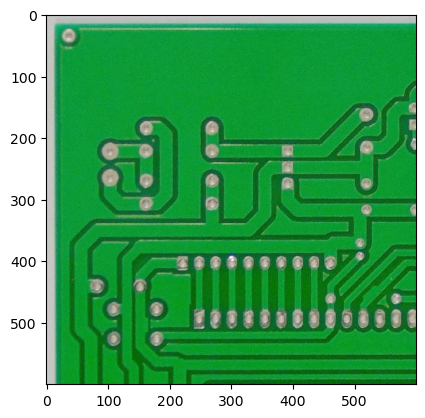

In [6]:
a = plt.imread(df.iloc[0][0])
plt.imshow(a)
plt.show()

/tmp/ipykernel_4672/2660252564.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a  = plt.imread(df.iloc[0][0])
/tmp/ipykernel_4672/2660252564.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  show_bbox(a, df.iloc[0][1], df.iloc[0][2], df.iloc[0][3], df.iloc[0][4])


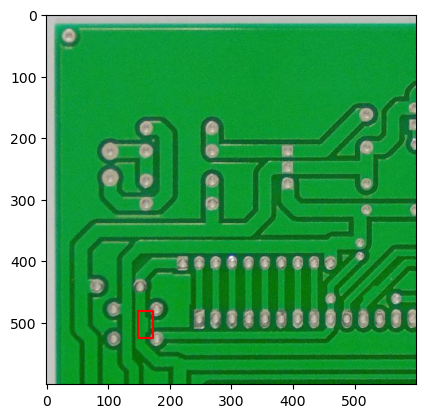

In [7]:
def show_bbox(im, x_min, y_min, x_max, y_max):
    plt.imshow(im)
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], '-r')
 
a  = plt.imread(df.iloc[0][0])
show_bbox(a, df.iloc[0][1], df.iloc[0][2], df.iloc[0][3], df.iloc[0][4])
plt.show()

Eight random images:

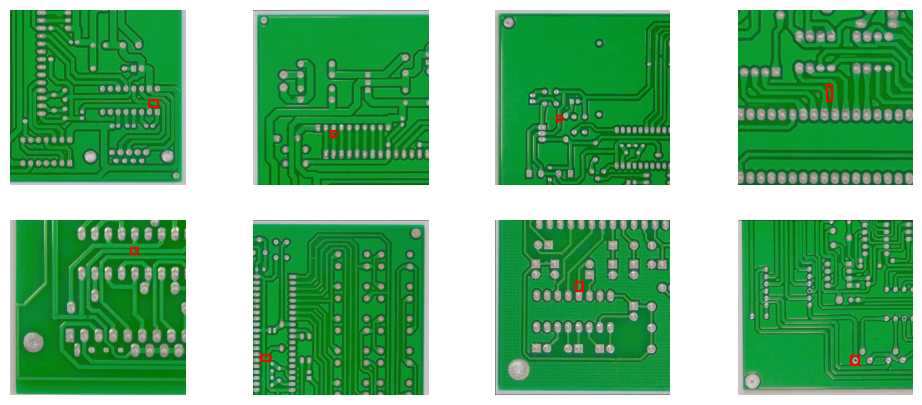

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12,5))
j=1
for i in np.random.randint(0, len(df), size=[8]):
    plt.subplot(2,4,j)
    plt.axis('off')
    im = plt.imread(df.filename[i])
    plt.imshow(im)
    x_min = df.xmin[i]
    x_max = df.xmax[i]
    y_min = df.ymin[i]
    y_max = df.ymax[i]
    show_bbox(im, x_min, y_min, x_max, y_max)
    j+=1

Creating a normalized center of the bndbox (xmoy,ymoy) and a width "w" and height "h"

In [9]:

df['xmoy'] = df.apply(lambda x: (((x.xmax - x.xmin)/2)+x.xmin)/600, axis = 1 ) 
df['ymoy'] = df.apply(lambda x: (((x.ymax - x.ymin)/2)+x.ymin)/600, axis = 1 ) 
df['w'] = df.apply(lambda x: (x.xmax - x.xmin)/600, axis = 1 ) 
df['h'] = df.apply(lambda x: (x.ymax - x.ymin)/600, axis = 1 ) 


In [65]:
df

,filename,xmin,ymin,xmax,ymax,defect_missing_hole,defect_mouse_bite,defect_open_circuit,defect_short,defect_spur,defect_spurious_copper,xmoy,ymoy,w,h
0,VOC_PCB/JPEGImages/rotation_90_light_05_spur_0...,148,481,172,524,0,0,0,0,1,0,0.266667,0.837500,0.040000,0.071667
1,VOC_PCB/JPEGImages/rotation_90_light_05_spur_0...,509,433,544,471,0,0,0,0,1,0,0.877500,0.753333,0.058333,0.063333
2,VOC_PCB/JPEGImages/light_05_mouse_bite_04_1_60...,478,320,503,340,0,1,0,0,0,0,0.817500,0.550000,0.041667,0.033333
3,VOC_PCB/JPEGImages/light_05_mouse_bite_04_1_60...,79,382,101,415,0,1,0,0,0,0,0.150000,0.664167,0.036667,0.055000
4,VOC_PCB/JPEGImages/l_light_11_missing_hole_01_...,131,1,161,34,1,0,0,0,0,0,0.243333,0.029167,0.050000,0.055000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21659,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,138,259,181,311,0,0,0,0,1,0,0.265833,0.475000,0.071667,0.086667
21660,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,526,373,569,403,0,0,0,0,1,0,0.912500,0.646667,0.071667,0.050000
21661,VOC_PCB/JPEGImages/light_11_spur_08_1_600.jpg,568,149,599,188,0,0,0,0,1,0,0.972500,0.280833,0.051667,0.065000
21662,VOC_PCB/JPEGImages/light_06_spur_07_3_600.jpg,264,449,281,492,0,0,0,0,1,0,0.454167,0.784167,0.028333,0.071667


Testing xmoy, ymoy, w, h

600
0.26666666666666666
160.0
24.0


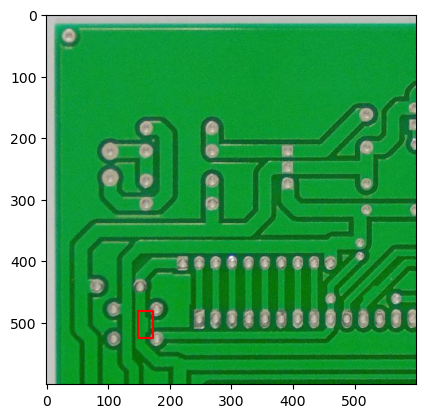

In [10]:
im = plt.imread(df.filename[0])
plt.imshow(im)
x_moy = df.xmoy[0]*im.shape[1]
print(im.shape[0])
print(df.xmoy[0])
print(x_moy)
y_moy = df.ymoy[0]*im.shape[0]
w = df.w[0]*im.shape[1]
h = df.h[0]*im.shape[0]
print(w)
    
x_min = x_moy-w/2
x_max = x_moy+w/2
y_min = y_moy-h/2
y_max = y_moy+h/2
show_bbox(im, x_min, y_min, x_max, y_max)

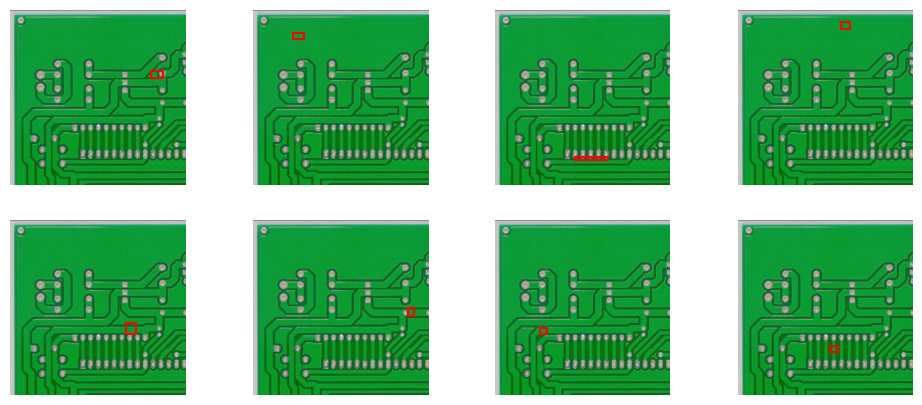

In [11]:
plt.figure(figsize=(12,5))
j=1
for i in np.random.randint(0, len(df), size=[8]):
    plt.subplot(2,4,j)
    plt.axis('off')
    im = plt.imread(df.filename[0])
    plt.imshow(im)
    x_moy = df.xmoy[i]*im.shape[1]
    y_moy = df.ymoy[i]*im.shape[0]
    w = df.w[i]*im.shape[1]
    h = df.h[i]*im.shape[0]
    
    x_min = x_moy-w/2
    x_max = x_moy+w/2
    y_min = y_moy-h/2
    y_max = y_moy+h/2
    show_bbox(im, x_min, y_min, x_max, y_max)
    j+=1

Generating a CNN for the bndbox first:

In [12]:
from sklearn.model_selection import train_test_split
y = df[['xmoy', 'ymoy', 'w', 'h']].values
X_train_path, X_test_path, y_train, y_test = train_test_split(df["filename"].values, y, test_size=0.2, random_state=1234)

Transforming data train set:

In [13]:
def transform(x ,y):
    a = tf.io.read_file(x)
    a = tf.image.decode_jpeg(a)
    return tf.image.resize(a, (256,256)), y

#testing with image size of 600x600 results in an training time of each epoch on my laptop of around 4 hours

dataset_train = tf.data.Dataset.from_tensor_slices((X_train_path, y_train))
dataset_train = dataset_train.map(transform)
dataset_train = dataset_train.batch(32)

Test function transform:

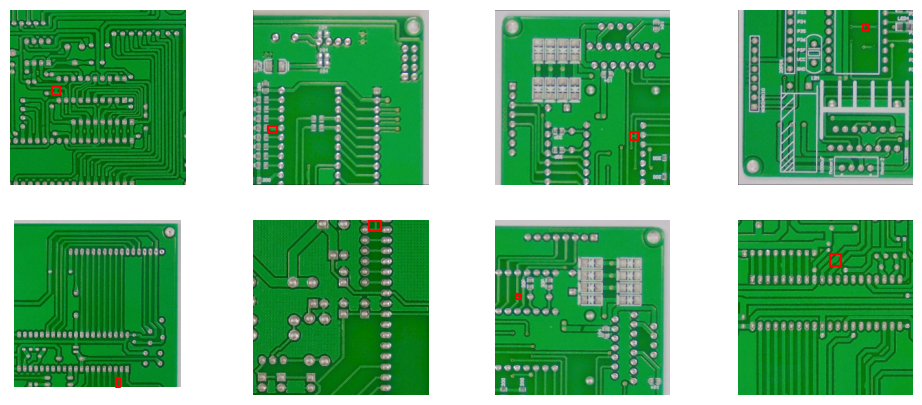

In [14]:
X_t, y_t = next(iter(dataset_train))

plt.figure(figsize=(12,5))
j=1
for i in np.random.randint(0, len(X_t), size=[8]):
    plt.subplot(2,4,j)
    plt.axis('off')
    im = X_t[i]
    x_moy = y_t[i][0]*im.shape[1]
    y_moy = y_t[i][1]*im.shape[0]
    w = y_t[i][2]*im.shape[1]
    h = y_t[i][3]*im.shape[0]
    
    x_min = x_moy-w/2
    x_max = x_moy+w/2
    y_min = y_moy-h/2
    y_max = y_moy+h/2
    show_bbox(im/255, x_min, y_min, x_max, y_max)
    j+=1

Transforming Test Set:

In [15]:
def transform(x ,y):
    a = tf.io.read_file(x)
    a = tf.image.decode_jpeg(a)
    return tf.image.resize(a, (256,256)), y



dataset_test = tf.data.Dataset.from_tensor_slices((X_test_path, y_test))
dataset_test = dataset_test.map(transform)
dataset_test = dataset_test.batch(32)

Modelization:

In [16]:
from tensorflow.keras.applications import EfficientNetB1

efficientNet = EfficientNetB1(include_top=False, input_shape=(256, 256, 3))
for layer in efficientNet.layers:
    layer.trainable = False

In [17]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, Sequential
#from tensorflow.keras.applications import VGG16
#vgg = VGG16(include_top=False)


model = Sequential()
model.add(efficientNet)
model.add(GlobalAveragePooling2D())
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional  (None, 8, 8, 1280)        6575239   
 )                                                               
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2048)              2623488   
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 8

Defining a loss function:

In [18]:
def loss_function(y_true, y_pred):
    return 1/32 * (tf.math.reduce_sum(abs(y_true[:,0] - y_pred[:,0])
                                      + abs(y_true[:,1] - y_pred[:,1]) 
                                      + tf.math.square(tf.math.sqrt(abs(y_true[:,2])) - tf.math.sqrt(y_pred[:,2])) 
                                      + tf.math.square(tf.math.sqrt(abs(y_true[:,3])) - tf.math.sqrt(y_pred[:,3]))
                                      )
                   )


model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

Testing loss function:

In [19]:
X_t, y_t = next(iter(dataset_train))
# Prediction of x, y, w and h for each image of the batch
y_pred = model(X_t)
# Converting to float64 to prevent any type issues
y_pred = tf.cast(y_pred, tf.float64)
# loss calculation
loss_function(y_t, y_pred)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9171452008466829>

Callback to save model:

In [25]:
from tensorflow.keras import callbacks


cwd = os.getcwd()
filepath = cwd

checkpoint = callbacks.ModelCheckpoint(filepath=filepath, 
                                       monitor='val_loss',
                                       save_best_only=True,
                                       save_weights_only=False,
                                       mode='min',
                                       save_freq='epoch')


early_stopping = callbacks.EarlyStopping(monitor='val_loss',
                                         patience=3,
                                         mode='min',
                                         restore_best_weights=True)

In [26]:

model.fit(dataset_train, epochs=10, validation_data=dataset_test, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/10


542/542 [==============================] - ETA: 0s - loss: 0.4152 - accuracy: 0.6262INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


542/542 [==============================] - 1544s 3s/step - loss: 0.4152 - accuracy: 0.6262 - val_loss: 0.4074 - val_accuracy: 0.6264
Epoch 2/10
542/542 [==============================] - ETA: 0s - loss: 0.4093 - accuracy: 0.6330INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


542/542 [==============================] - 1043s 2s/step - loss: 0.4093 - accuracy: 0.6330 - val_loss: 0.3997 - val_accuracy: 0.6358
Epoch 3/10
542/542 [==============================] - 1254s 2s/step - loss: 0.4059 - accuracy: 0.6398 - val_loss: 0.4003 - val_accuracy: 0.6492
Epoch 4/10
542/542 [==============================] - ETA: 0s - loss: 0.4042 - accuracy: 0.6458INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


542/542 [==============================] - 1023s 2s/step - loss: 0.4042 - accuracy: 0.6458 - val_loss: 0.3983 - val_accuracy: 0.6494
Epoch 5/10
542/542 [==============================] - ETA: 0s - loss: 0.4033 - accuracy: 0.6434INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


542/542 [==============================] - 904s 2s/step - loss: 0.4033 - accuracy: 0.6434 - val_loss: 0.3975 - val_accuracy: 0.6513
Epoch 6/10
542/542 [==============================] - 960s 2s/step - loss: 0.4020 - accuracy: 0.6461 - val_loss: 0.3984 - val_accuracy: 0.6476
Epoch 7/10
542/542 [==============================] - ETA: 0s - loss: 0.4015 - accuracy: 0.6469INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


542/542 [==============================] - 1527s 3s/step - loss: 0.4015 - accuracy: 0.6469 - val_loss: 0.3967 - val_accuracy: 0.6464
Epoch 8/10
542/542 [==============================] - ETA: 0s - loss: 0.4011 - accuracy: 0.6515INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


INFO:tensorflow:Assets written to: /home/gernot/Schreibtisch/DataScience Module/Project PCB/assets


542/542 [==============================] - 1424s 3s/step - loss: 0.4011 - accuracy: 0.6515 - val_loss: 0.3960 - val_accuracy: 0.6538
Epoch 9/10
542/542 [==============================] - 1892s 3s/step - loss: 0.4010 - accuracy: 0.6505 - val_loss: 0.3969 - val_accuracy: 0.6494
Epoch 10/10
542/542 [==============================] - 1491s 3s/step - loss: 0.4001 - accuracy: 0.6525 - val_loss: 0.3970 - val_accuracy: 0.6543


Load model:

In [ ]:
model = keras.models.load_model('variables')
model.load_weights('variables')




Testing trained model:

In [30]:
loss, acc = model.evaluate(dataset_train, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

ValueError: `y` argument is not supported when using dataset as input.

1/1 [==============================] - 4s 4s/step


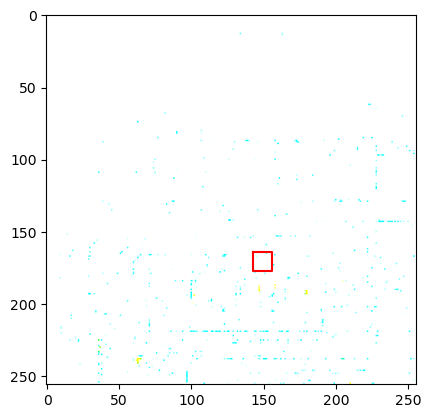

In [28]:
import numpy as np
import time
def show_img(im, model):
    plt.imshow(im)
    t0=time.time()
    
    x0,y0,w0,h0 = model.predict(np.array([im], dtype=np.float32))[0]
    
    x1= (x0-w0/2)*255
    x2= (x0+w0/2)*255
    y1= (y0-h0/2)*255
    y2= (y0+h0/2)*255
    show_bbox(im, x1, y1, x2, y2)
    plt.show()

a = plt.imread(df.filename[0])
#show_img(a,model)

def transform2(x):
    a = tf.io.read_file(x)
    a = tf.image.decode_jpeg(a)
    return tf.image.resize(a, (256,256))
show_img(transform2(df.filename[0]), model)